In [1]:
import sys
sys.path.append('../src/')

import wider_dataset

from benchmark.tools import *
from benchmark.models import Detector
from benchmark.utils import TsvHandle, run_detection, tf_to_image_faces

# https://github.com/sthanhng/yoloface
from yoloface import get_outputs_names, post_process

In [2]:
train, test, validation = tfds.load('wider_dataset', split=['train', 'test', 'validation'])
data = validation.take(50)

In [3]:
class YoloFaceDetector(Detector):
    IMG_WIDTH = 416
    IMG_HEIGHT = 416

    CONF_THRESHOLD = 0.5
    NMS_THRESHOLD = 0.4
    
    def __init__(self):
        model_cfg = '../src/yoloface/cfg/yolov3-face.cfg'
        model_weights = '../src/yoloface/model-weights/yolov3-wider_16000.weights'
        
        self.detector = cv2.dnn.readNetFromDarknet(model_cfg, model_weights)
        self.detector.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
        self.detector.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)
    
    def detect(self, image):
        blob = cv2.dnn.blobFromImage(image, 1 / 255, (self.IMG_WIDTH, self.IMG_HEIGHT),
                                     [0, 0, 0], 1, crop=False)
        self.detector.setInput(blob)
        outs = self.detector.forward(get_outputs_names(self.detector))

        boxes, confidence = post_process(image, outs, self.CONF_THRESHOLD, self.NMS_THRESHOLD)

        return boxes, confidence
    
yolo_face = YoloFaceDetector()

Running detection
Speed: 438.464ms
Precision: 1.0
Recall: 0.875
F1 Score: 0.9333333333333333
Ious: [0.7788707204905467, 0.856114272442225, 0.8571428571428571, 0.8163044945336753, 0.8211567732115678, 0.8721043410550905, 0.6980062191329797]
Positives: 7, False Positives: 0, Negatives: 1


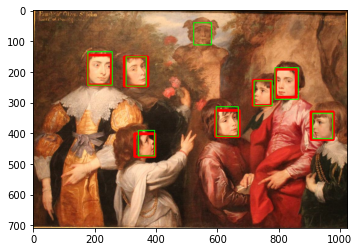

Speed: 438.0674ms
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Ious: []
Positives: 0, False Positives: 0, Negatives: 1


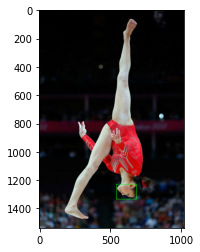

Speed: 425.3286ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.740495867768595]
Positives: 1, False Positives: 0, Negatives: 0


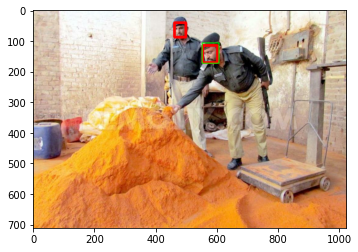

Speed: 437.2848ms
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Ious: []
Positives: 0, False Positives: 0, Negatives: 0


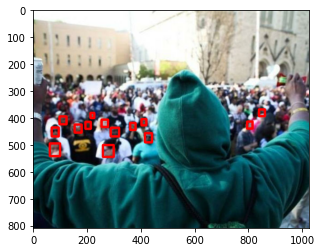

Speed: 493.7936ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.8104374520337683, 0.7985791893021312, 0.8164779383053494, 0.8868458274398868, 0.8591954022988506, 0.8715415019762845, 0.8091018928715263]
Positives: 7, False Positives: 0, Negatives: 0


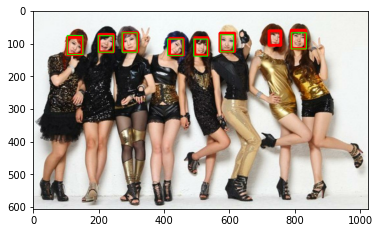

Speed: 430.1481ms
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Ious: []
Positives: 0, False Positives: 0, Negatives: 0


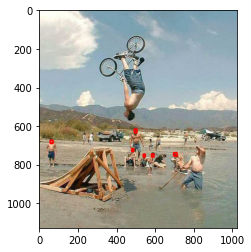

Speed: 453.8613ms
Precision: 1.0
Recall: 0.3333333333333333
F1 Score: 0.5
Ious: [0.8111432706222865]
Positives: 1, False Positives: 0, Negatives: 2


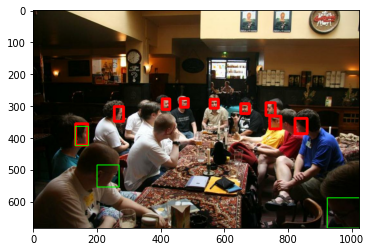

Speed: 440.2777ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.883626826526789, 0.7327823691460055, 0.9552825552825552, 0.6817113305124589]
Positives: 4, False Positives: 0, Negatives: 0


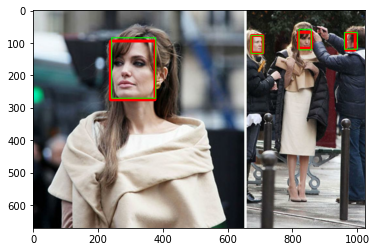

Speed: 458.3143ms
Precision: 1.0
Recall: 0.4
F1 Score: 0.5714285714285715
Ious: [0.580018501387604, 0.7316868982838007]
Positives: 2, False Positives: 0, Negatives: 3


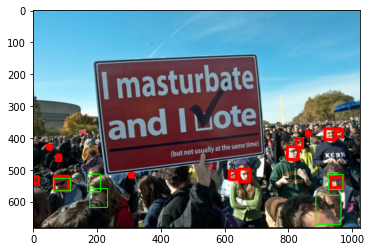

Speed: 467.3633ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.6738294394769734, 0.7816558441558441, 0.3926309729418538]
Positives: 3, False Positives: 0, Negatives: 0


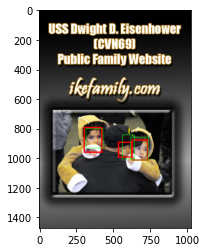

Speed: 424.2564ms
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Ious: []
Positives: 0, False Positives: 0, Negatives: 0


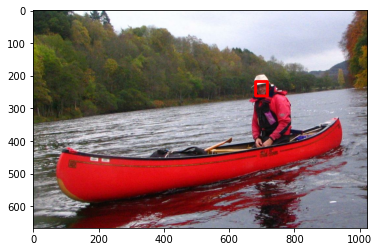

Speed: 468.599ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.8152840487903498]
Positives: 1, False Positives: 0, Negatives: 0


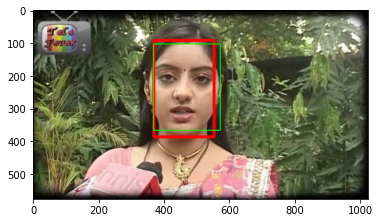

Speed: 435.6179ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.8427025493454383]
Positives: 1, False Positives: 0, Negatives: 0


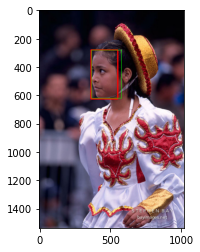

Speed: 449.1494ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.8785132852096452, 0.8450806118230674, 0.9013052029322367]
Positives: 3, False Positives: 0, Negatives: 0


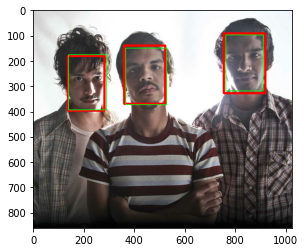

Speed: 517.813ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.8168249660786974]
Positives: 1, False Positives: 0, Negatives: 0


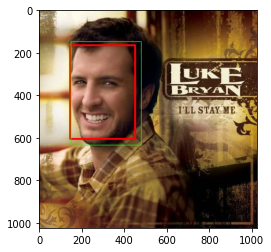

Speed: 437.4428ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.9075869937250428, 0.6814644774725702, 0.8588429009804656, 0.8116133289343451, 0.7870082083215397]
Positives: 5, False Positives: 0, Negatives: 0


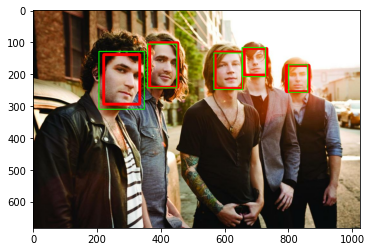

Speed: 428.7365ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.8505839710028191, 0.8405524681268388]
Positives: 2, False Positives: 0, Negatives: 0


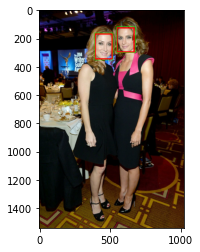

Speed: 440.4689ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.8541699511272268]
Positives: 1, False Positives: 0, Negatives: 0


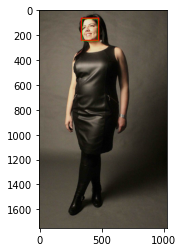

Speed: 444.124ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.8237476808905381]
Positives: 1, False Positives: 0, Negatives: 0


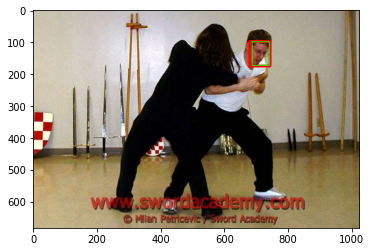

Speed: 433.2978ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.8, 0.8678304239401496]
Positives: 2, False Positives: 0, Negatives: 0


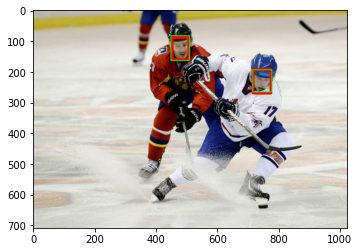

Speed: 454.449ms
Precision: 0.5
Recall: 1.0
F1 Score: 0.6666666666666666
Ious: [0.8447017766497462, 0.0]
Positives: 1, False Positives: 1, Negatives: 0


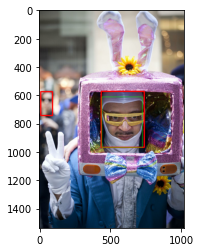

Speed: 448.424ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.6276351970669111]
Positives: 1, False Positives: 0, Negatives: 0


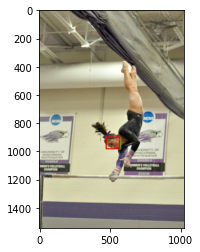

Speed: 416.6519ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.7258155230596175, 0.7909604519774012, 0.74235807860262, 0.8533333333333334]
Positives: 4, False Positives: 0, Negatives: 0


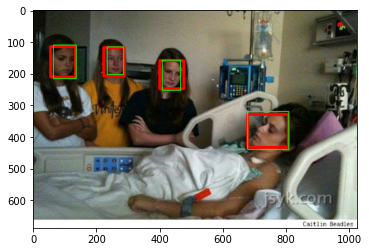

Speed: 451.3512ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.810197527629]
Positives: 1, False Positives: 0, Negatives: 0


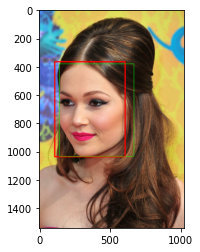

Speed: 422.4757ms
Precision: 1.0
Recall: 0.8333333333333334
F1 Score: 0.9090909090909091
Ious: [0.8771929824561403, 0.825311203319502, 0.8272800645682001, 0.8078476630121177, 0.642570281124498]
Positives: 5, False Positives: 0, Negatives: 1


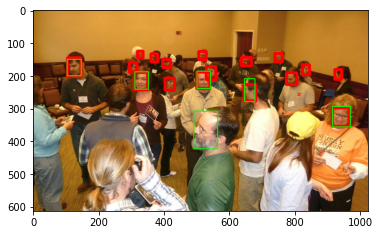

Speed: 417.3562ms
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Ious: []
Positives: 0, False Positives: 0, Negatives: 1


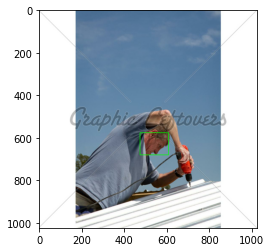

Speed: 435.8522ms
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Ious: []
Positives: 0, False Positives: 0, Negatives: 0


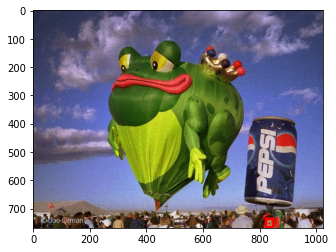

Speed: 425.2692ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.8765752409191994]
Positives: 1, False Positives: 0, Negatives: 0


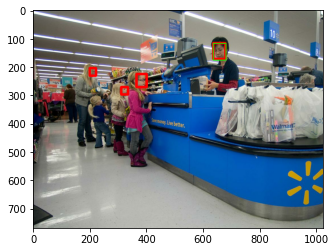

Speed: 531.0033ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.5915215248110417]
Positives: 1, False Positives: 0, Negatives: 0


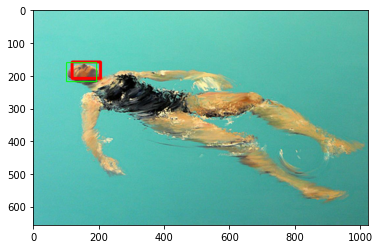

Speed: 432.2315ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.8238775682759787]
Positives: 1, False Positives: 0, Negatives: 0


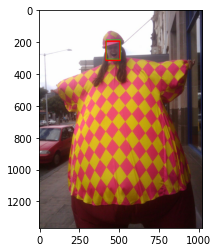

Speed: 435.2853ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.8510452327190619, 0.8693181818181818]
Positives: 2, False Positives: 0, Negatives: 0


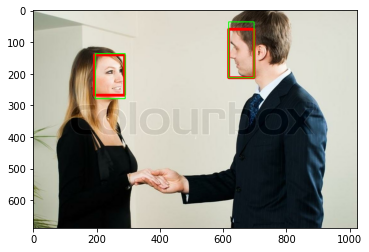

Speed: 448.3949ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.6651828681424446, 0.896777872825777]
Positives: 2, False Positives: 0, Negatives: 0


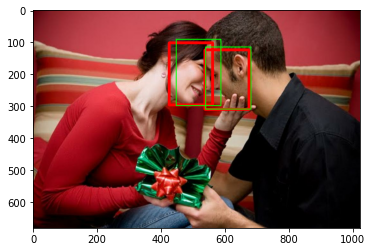

Speed: 448.058ms
Precision: 0.5
Recall: 1.0
F1 Score: 0.6666666666666666
Ious: [0.6352682631100334, 0.0]
Positives: 1, False Positives: 1, Negatives: 0


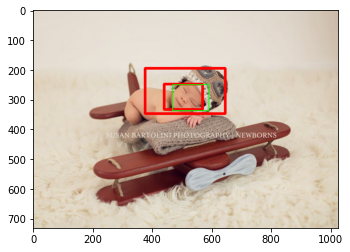

Speed: 440.8163ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.6831530139103554]
Positives: 1, False Positives: 0, Negatives: 0


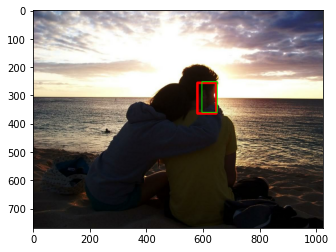

Speed: 442.8286ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.90595340811044]
Positives: 1, False Positives: 0, Negatives: 0


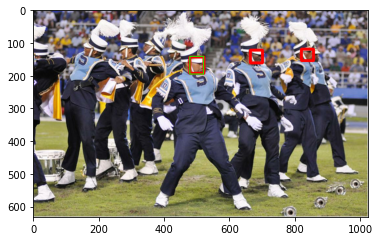

Speed: 444.6716ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.93553755686231]
Positives: 1, False Positives: 0, Negatives: 0


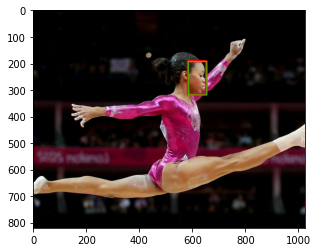

Speed: 438.0806ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.8840626254516258, 0.8594614003590664]
Positives: 2, False Positives: 0, Negatives: 0


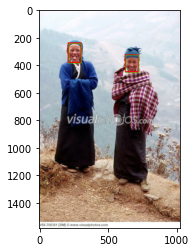

Speed: 505.6433ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.7767382767382768]
Positives: 1, False Positives: 0, Negatives: 0


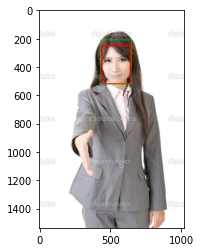

Speed: 439.5905ms
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Ious: []
Positives: 0, False Positives: 0, Negatives: 0


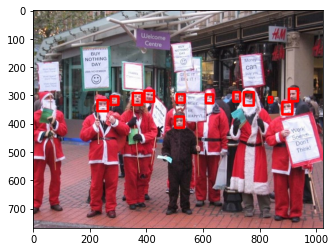

Speed: 428.0208ms
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Ious: []
Positives: 0, False Positives: 0, Negatives: 0


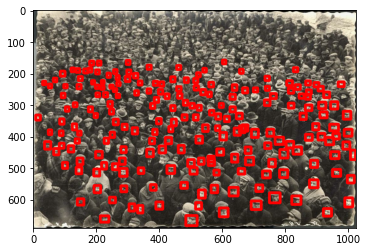

Speed: 522.3532ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.6591760299625468, 0.7142857142857143]
Positives: 2, False Positives: 0, Negatives: 0


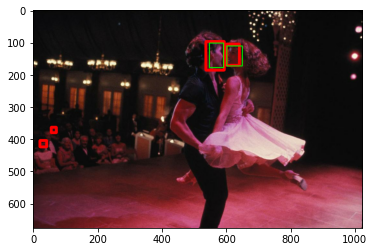

Speed: 446.3678ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.8659564411155146]
Positives: 1, False Positives: 0, Negatives: 0


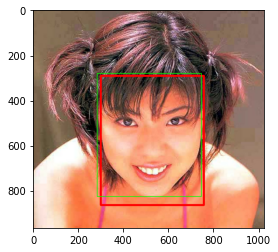

Speed: 443.9908ms
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Ious: []
Positives: 0, False Positives: 0, Negatives: 0


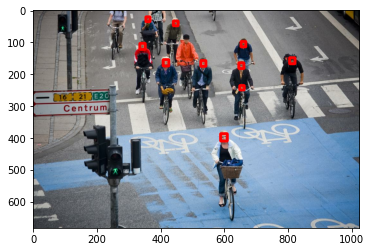

Speed: 430.5502ms
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Ious: []
Positives: 0, False Positives: 0, Negatives: 0


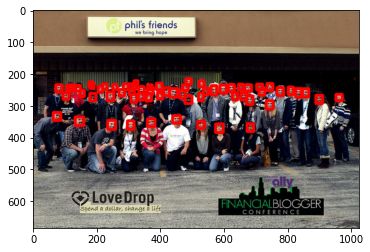

Speed: 430.5714ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.676403181593493]
Positives: 1, False Positives: 0, Negatives: 0


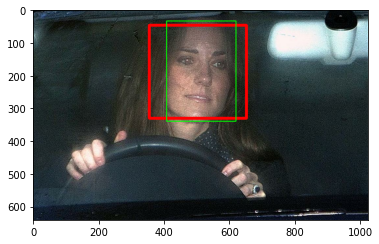

Speed: 421.4426ms
Precision: 0.6666666666666666
Recall: 1.0
F1 Score: 0.8
Ious: [0.7116032272914496, 0.519763591398751, 0.0]
Positives: 2, False Positives: 1, Negatives: 0


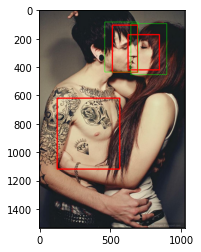

Speed: 422.2486ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.9243977106348995]
Positives: 1, False Positives: 0, Negatives: 0


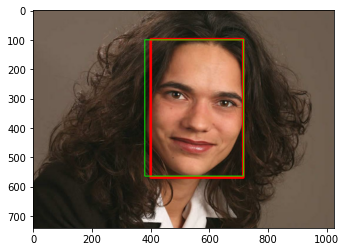

Speed: 429.212ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.7788215200683177]
Positives: 1, False Positives: 0, Negatives: 0


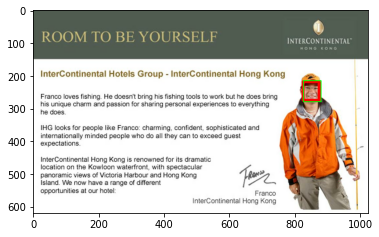

Speed: 422.7428ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.9164430130613705]
Positives: 1, False Positives: 0, Negatives: 0


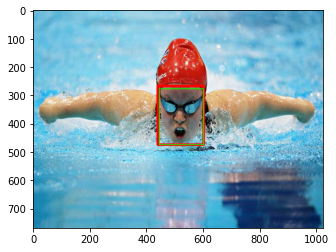

Speed: 462.3862ms
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Ious: [0.7254088919603778]
Positives: 1, False Positives: 0, Negatives: 0


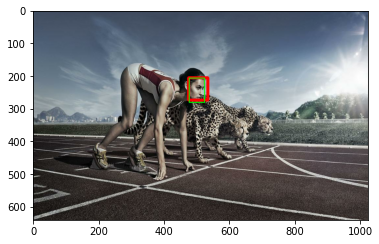

In [8]:
with TsvHandle('yoloface') as tsv:
    run_detection(tsv, data, yolo_face, cv2.COLOR_RGB2BGR, True, True, cv2.COLOR_BGR2RGB, 2000)